In [ ]:
import os

import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
labelled_words = pd.read_csv('labelled_words.csv')
data_path = "../../data_collection/data/processed"
curr_india = pd.read_csv(os.path.join(data_path, "india_curr.csv"))
curr_usa = pd.read_csv(os.path.join(data_path, "usa_curr.csv"))

In [ ]:
curr_data = curr_usa.fillna("Not inferred")

In [ ]:
def get_gds_labels(x):

    labels = ""

    if x == 'Not inferred':
        return x
    x = x.lower()
    for word, label in zip(list(labelled_words['word']), list(labelled_words['labels'])):
        if word in x:
            labels = labels + ";" + label

    return labels

In [ ]:
curr_data['gds_labels'] = curr_data['compulsory course'].apply(get_gds_labels)


In [ ]:
def gds_labels_to_list(x):

    temp = x.split(";")
    temp = [element.strip() for element in temp if len(element) != 0]
    gds_labels = list(set(temp))

    if len(gds_labels) != 0:
        if 'Not determinable' in gds_labels:
            gds_labels.remove('Not determinable')

    return gds_labels

def compute_gds_label_proportion(x):

    x = gds_labels_to_list(x)
    
    counter_dictionary = Counter(x)

    return counter_dictionary

def extract_proportions(proportions_dict, label):
    try:
        p = proportions_dict[label]
    except:
        p = 0
    return p

In [ ]:
curr_data['gds_label_proportions'] = curr_data['gds_labels'].apply(compute_gds_label_proportion)

curr_data.head()

,url,compulsory course,course outcome or overview,topics covered,Unnamed: 4,Unnamed: 5,gds_labels,gds_label_proportions
0,https://www.seas.harvard.edu/applied-computati...,Systems Development for Computational Science,This is a project-based course emphasizing des...,Not inferred,Not inferred,Not inferred,;Computing with Data;Computing with Data;Compu...,{'Computing with Data': 1}
1,https://www.seas.harvard.edu/applied-computati...,Introduction to Data Science,Data Science 1 is the first half of a one-year...,Not inferred,Not inferred,Not inferred,;Not determinable;Computing with Data;Data Gat...,"{'Data Gathering, Preparation and Exploration'..."
2,https://www.seas.harvard.edu/applied-computati...,Advanced Topics in Data Science,Data Science 2 is the second half of a one-yea...,Not inferred,Not inferred,Not inferred,";Computing with Data;Data Gathering, Preparati...","{'Data Gathering, Preparation and Exploration'..."
3,https://www.seas.harvard.edu/applied-computati...,Critical Thinking in Data Science,This course examines the wide-ranging impact d...,Not inferred,Not inferred,Not inferred,";Computing with Data;Data Gathering, Preparati...","{'Data Gathering, Preparation and Exploration'..."
4,https://www.seas.harvard.edu/applied-computati...,Advanced Scientific Computing: Stochastic Meth...,Not inferred,Not inferred,Not inferred,Not inferred,;Not determinable;Computing with Data;Data Gat...,"{'Data Gathering, Preparation and Exploration'..."


In [ ]:
labels = [
    "Data Gathering, Preparation and Exploration",
    "Data Representation and Transformation",
    "Computing with Data",
    "Data Modeling",
    "Data Visualization and Presentation",
    "Science about Data Science",
    "Not determinable",
]

for label in labels:
    curr_data[label] = np.nan

for label in labels:
    curr_data[label] = curr_data.gds_label_proportions.apply(lambda x: extract_proportions(x, label))

curr_data.head()

,url,compulsory course,course outcome or overview,topics covered,Unnamed: 4,Unnamed: 5,gds_labels,gds_label_proportions,"Data Gathering, Preparation and Exploration",Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable
0,https://www.seas.harvard.edu/applied-computati...,Systems Development for Computational Science,This is a project-based course emphasizing des...,Not inferred,Not inferred,Not inferred,;Computing with Data;Computing with Data;Compu...,{'Computing with Data': 1},0,0,1,0,0,0,0
1,https://www.seas.harvard.edu/applied-computati...,Introduction to Data Science,Data Science 1 is the first half of a one-year...,Not inferred,Not inferred,Not inferred,;Not determinable;Computing with Data;Data Gat...,"{'Data Gathering, Preparation and Exploration'...",1,1,1,1,1,0,0
2,https://www.seas.harvard.edu/applied-computati...,Advanced Topics in Data Science,Data Science 2 is the second half of a one-yea...,Not inferred,Not inferred,Not inferred,";Computing with Data;Data Gathering, Preparati...","{'Data Gathering, Preparation and Exploration'...",1,1,1,1,1,0,0
3,https://www.seas.harvard.edu/applied-computati...,Critical Thinking in Data Science,This course examines the wide-ranging impact d...,Not inferred,Not inferred,Not inferred,";Computing with Data;Data Gathering, Preparati...","{'Data Gathering, Preparation and Exploration'...",1,1,1,1,1,1,0
4,https://www.seas.harvard.edu/applied-computati...,Advanced Scientific Computing: Stochastic Meth...,Not inferred,Not inferred,Not inferred,Not inferred,;Not determinable;Computing with Data;Data Gat...,"{'Data Gathering, Preparation and Exploration'...",1,1,1,1,1,0,0


In [ ]:
# check
temp = curr_data[labels]
temp.sum(axis=1).unique()

array([1, 5, 6, 3, 2, 4, 0])

In [ ]:
curr_data_sub = pd.concat([curr_data[['compulsory course', 'url']], temp], axis=1)
curr_data_sub.head()

,compulsory course,url,"Data Gathering, Preparation and Exploration",Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable
0,Systems Development for Computational Science,https://www.seas.harvard.edu/applied-computati...,0,0,1,0,0,0,0
1,Introduction to Data Science,https://www.seas.harvard.edu/applied-computati...,1,1,1,1,1,0,0
2,Advanced Topics in Data Science,https://www.seas.harvard.edu/applied-computati...,1,1,1,1,1,0,0
3,Critical Thinking in Data Science,https://www.seas.harvard.edu/applied-computati...,1,1,1,1,1,1,0
4,Advanced Scientific Computing: Stochastic Meth...,https://www.seas.harvard.edu/applied-computati...,1,1,1,1,1,0,0


In [ ]:
curr_data_sub_grouped_by_url = curr_data_sub.groupby(['url'], as_index=False).agg({
    'Data Gathering, Preparation and Exploration': 'sum',
    'Data Representation and Transformation': 'sum',
    'Computing with Data': 'sum',
    'Data Modeling': 'sum',
    'Data Visualization and Presentation': 'sum',
    'Science about Data Science': 'sum',
    'Not determinable': 'sum',
})

curr_data_sub_grouped_by_url.head()

,url,"Data Gathering, Preparation and Exploration",Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable
0,http://www.bu.edu/cs/masters/program/ai/,3,1,4,2,0,1,0
1,http://www.bu.edu/questrom/ms-in-business-anal...,7,5,8,8,5,2,0
2,http://www.buffalo.edu/grad/programs/business-...,6,6,6,6,5,0,0
3,http://www.buffalo.edu/grad/programs/data-anal...,1,2,4,2,1,0,0
4,https://ai.meng.duke.edu/degree,2,3,10,7,2,2,0


In [ ]:
# normalize now (just checking)
curr_data_sub_grouped_by_url.drop('url', axis=1).div(curr_data_sub_grouped_by_url.sum(axis=1), axis=0).fillna(0)

,"Data Gathering, Preparation and Exploration",Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable
0,0.272727,0.090909,0.363636,0.181818,0.000000,0.090909,0.0
1,0.200000,0.142857,0.228571,0.228571,0.142857,0.057143,0.0
2,0.206897,0.206897,0.206897,0.206897,0.172414,0.000000,0.0
3,0.100000,0.200000,0.400000,0.200000,0.100000,0.000000,0.0
4,0.076923,0.115385,0.384615,0.269231,0.076923,0.076923,0.0
...,...,...,...,...,...,...,...
76,0.162791,0.186047,0.255814,0.186047,0.186047,0.023256,0.0
77,0.181818,0.181818,0.227273,0.181818,0.181818,0.045455,0.0
78,0.176471,0.117647,0.411765,0.176471,0.117647,0.000000,0.0
79,0.180000,0.200000,0.220000,0.200000,0.160000,0.040000,0.0


In [ ]:
curr_data_sub_grouped_by_url['sno'] = [str(ele+1) for ele in range(curr_data_sub_grouped_by_url.shape[0])]

normalized_curr_data_sub_grouped_by_url = pd.concat([curr_data_sub_grouped_by_url[['url', 'sno']], curr_data_sub_grouped_by_url.drop(['url', 'sno'], axis=1).div(curr_data_sub_grouped_by_url.sum(axis=1), axis=0).fillna(0)], axis=1)
normalized_curr_data_sub_grouped_by_url.index = normalized_curr_data_sub_grouped_by_url.sno
normalized_curr_data_sub_grouped_by_url = normalized_curr_data_sub_grouped_by_url.drop('sno', axis=1)
normalized_curr_data_sub_grouped_by_url.head()

,url,"Data Gathering, Preparation and Exploration",Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable
sno,,,,,,,,
1,http://www.bu.edu/cs/masters/program/ai/,0.272727,0.090909,0.363636,0.181818,0.000000,0.090909,0.0
2,http://www.bu.edu/questrom/ms-in-business-anal...,0.200000,0.142857,0.228571,0.228571,0.142857,0.057143,0.0
3,http://www.buffalo.edu/grad/programs/business-...,0.206897,0.206897,0.206897,0.206897,0.172414,0.000000,0.0
4,http://www.buffalo.edu/grad/programs/data-anal...,0.100000,0.200000,0.400000,0.200000,0.100000,0.000000,0.0
5,https://ai.meng.duke.edu/degree,0.076923,0.115385,0.384615,0.269231,0.076923,0.076923,0.0


<Figure size 1080x576 with 0 Axes>

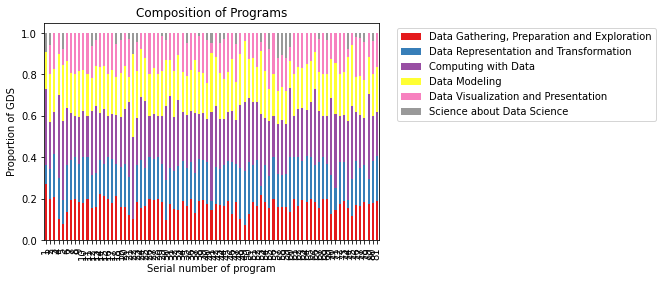

In [ ]:
# basic stacked plot

plt.figure(figsize=(15,8))
normalized_curr_data_sub_grouped_by_url.drop(['url', 'Not determinable'], axis=1).plot.bar(stacked=True, colormap='Set1')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Composition of Programs')
plt.xlabel('Serial number of program')
plt.ylabel('Proportion of GDS')
plt.show()

In [15]:
import pandas as pd
f = pd.read_csv('../../data_collection/data/labelled/academic_data.csv')
f.head()

,uni_name,pgm_name,dur_yrs,type,national_rank_qs,dept_involved,location,url,descr,header_tag,...,"Data Gathering, Preparation and Exploration",Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Soft Skills,Domain Specific,Not determinable,country
0,Indian Institute of Science Bangalore,M.Tech. Computational and Data Science,2,Public,2,Department of Computational and Data Sciences,Karnataka,http://cds.iisc.ac.in/admissions/course-degrees/,Computational Science and Data Science are int...,"['h1', 'h2', 'h3']",...,0.083333,0.250000,0.416667,0.166667,0.083333,0.000000,0.0,0.0,0.0,India
1,Indian Institute of Science Bangalore,M.Tech. Artificial Intelligence,2,Public,2,Departments of Computer Science and Automation...,Karnataka,https://eecs.iisc.ac.in/mtechai/,Artificial Intelligence has captured the ima...,"['h1', 'h2']",...,0.125000,0.208333,0.333333,0.250000,0.041667,0.041667,0.0,0.0,0.0,India
2,University of Hyderabad,MBA Business Analytics,2,Public,8,School of Management Studies,Telangana,https://smsuoh.ac.in/mba/mba-business-analytics/,The School has launched a two year MBA in Bus...,"['h2', 'h4']",...,0.166667,0.177778,0.300000,0.177778,0.155556,0.022222,0.0,0.0,0.0,India
3,University of Hyderabad,M.Tech. Artificial Intelligence,2,Public,8,School of Computer and Information Sciences,Telangana,https://scis.uohyd.ac.in/Academic/Programmes/m...,M.Tech Artificial Intelligence is also a four...,['h2'],...,0.076923,0.153846,0.538462,0.076923,0.153846,0.000000,0.0,0.0,0.0,India
4,IIT Guwahati,M.Tech Data Science,2,Public,10,Departments of Computer Science and Engineerin...,Assam,https://www.iitg.ac.in/ds/,Data Science is gaining prominence in academi...,Not inferred,...,0.162791,0.209302,0.325581,0.186047,0.116279,0.000000,0.0,0.0,0.0,India


In [16]:
f.shape

(114, 27)

In [17]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uni_name                                     114 non-null    object 
 1   pgm_name                                     114 non-null    object 
 2   dur_yrs                                      114 non-null    object 
 3   type                                         114 non-null    object 
 4   national_rank_qs                             114 non-null    int64  
 5   dept_involved                                114 non-null    object 
 6   location                                     114 non-null    object 
 7   url                                          114 non-null    object 
 8   descr                                        114 non-null    object 
 9   header_tag                                   114 non-null    object 
 10  he